In [74]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [75]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/maule/Downloads/archive/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/maule/Downloads/archive/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [76]:
# Normalize
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [77]:
# Create CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 848s 1s/step - loss: 1.7122 - accuracy: 0.5415 - val_loss: 0.6867 - val_accuracy: 0.5568
Epoch 2/10
625/625 [==============================] - 834s 1s/step - loss: 0.6624 - accuracy: 0.6134 - val_loss: 0.6269 - val_accuracy: 0.6664
Epoch 3/10
625/625 [==============================] - 839s 1s/step - loss: 0.5992 - accuracy: 0.6721 - val_loss: 0.5534 - val_accuracy: 0.7162
Epoch 4/10
625/625 [==============================] - 845s 1s/step - loss: 0.5368 - accuracy: 0.7293 - val_loss: 0.4875 - val_accuracy: 0.7718
Epoch 5/10
625/625 [==============================] - 846s 1s/step - loss: 0.4928 - accuracy: 0.7600 - val_loss: 0.4417 - val_accuracy: 0.7924
Epoch 6/10
625/625 [==============================] - 849s 1s/step - loss: 0.4563 - accuracy: 0.7869 - val_loss: 0.4266 - val_accuracy: 0.8104
Epoch 7/10
625/625 [==============================] - 862s 1s/step - loss: 0.4356 - accuracy: 0.7985 - val_loss: 0.5217 - val_accuracy: 0.7476

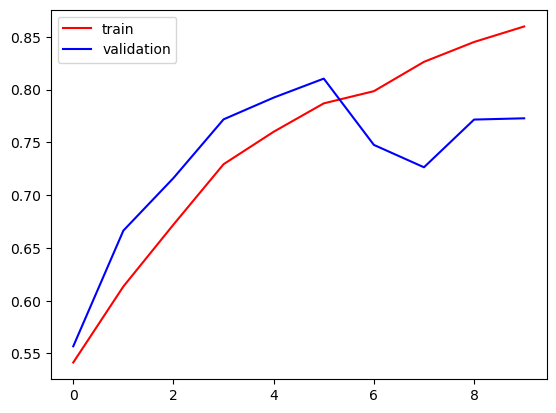

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

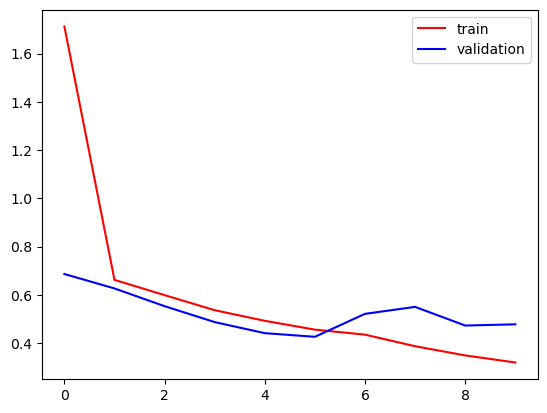

In [82]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [83]:
#Ways to reduce overfitting

#Add more data
#Data augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

In [84]:
pip install opencv-python

In [98]:
import cv2

In [105]:
test_img = cv2.imread('C:/Users/maule/Downloads/cat.jpg')

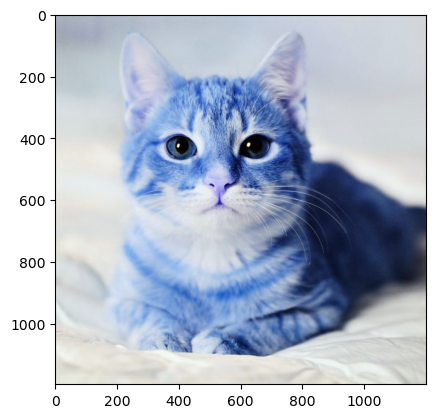

In [106]:
plt.imshow(test_img)

In [107]:
test_img.shape

(1197, 1200, 3)

In [108]:
test_img = cv2.resize(test_img, (256, 256))

In [109]:
test_input = test_img.reshape((1, 256, 256, 3))

In [110]:
model.predict(test_input)

1/1 [==============================] - 0s 48ms/step


array([[1.]], dtype=float32)